In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"BrentOilPrices (1).csv")
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


## Data Preprocessing

In [4]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [5]:
type(df["Date"])

pandas.core.series.Series

In [6]:
df.dtypes

Date      object
Price    float64
dtype: object

## Changing the Data Type of the Date column into Date time

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [9]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


## Changing the index column to Date

In [10]:
df.set_index("Date",inplace=True)
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68


##  Price variation graph of the crude oil 

In [11]:
import matplotlib.pyplot as plt

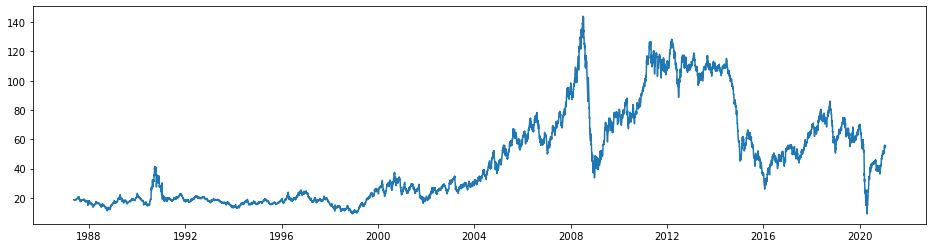

In [12]:
plt.figure(figsize=(16,4))
plt.plot(df["Price"])

<AxesSubplot:xlabel='Date'>

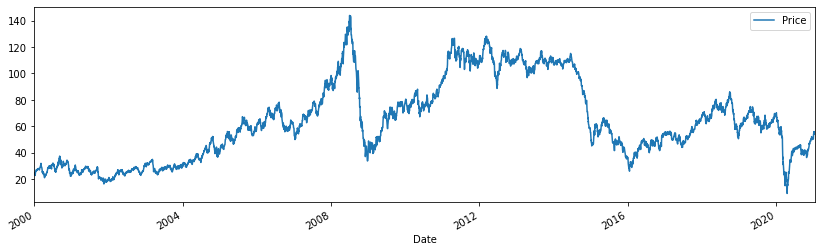

In [13]:
df.plot(xlim=['2000-01-01' , '2021-01-25'],figsize=(14,4))

## Highest Price of the crude oil

In [14]:
df["Price"].max()

143.95

## Lowest Price of the crude oil

In [15]:
df["Price"].min()

9.1

## Minimum crude oil price of each year

In [16]:
df_min = df.resample(rule='A').min()
df_min.head(10)

,Price
Date,
1987-12-31,15.03
1988-12-31,11.20
1989-12-31,16.05
1990-12-31,14.68
1991-12-31,17.60
1992-12-31,17.05
1993-12-31,13.13
1994-12-31,13.00
1995-12-31,15.35


In [17]:
df_min.tail(10)

,Price
Date,
2012-12-31,88.69
2013-12-31,96.84
2014-12-31,55.27
2015-12-31,35.26
2016-12-31,26.01
2017-12-31,43.98
2018-12-31,50.57
2019-12-31,53.23
2020-12-31,9.12


<AxesSubplot:xlabel='Date'>

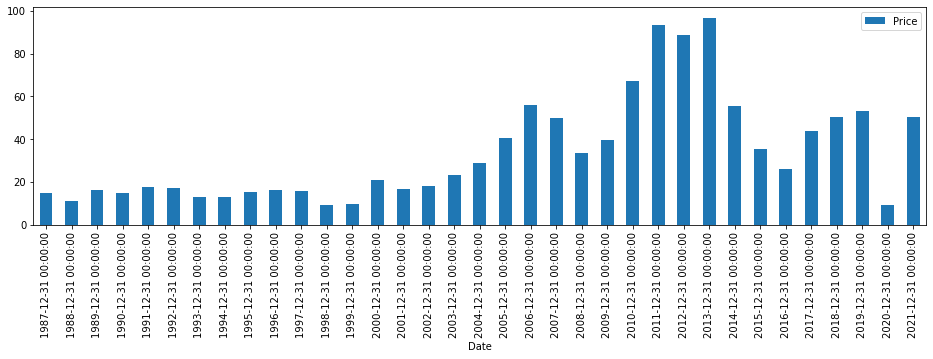

In [18]:
df_min.plot(kind = 'bar', figsize=(16,4))

## Maximum crude oil price of each year

In [19]:
df_max = df.resample(rule='A').max()
df_max.head(10)

,Price
Date,
1987-12-31,20.95
1988-12-31,17.95
1989-12-31,22.25
1990-12-31,41.45
1991-12-31,30.28
1992-12-31,21.55
1993-12-31,19.60
1994-12-31,19.03
1995-12-31,19.38


<AxesSubplot:xlabel='Date'>

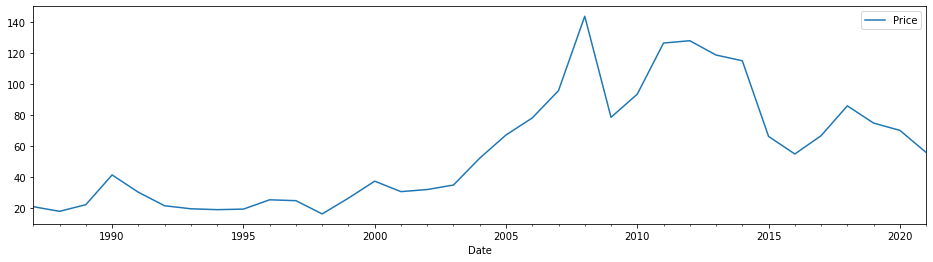

In [20]:
df_max.plot(figsize=(16,4))

## Checking the distribution of Price

In [21]:
import seaborn as sns

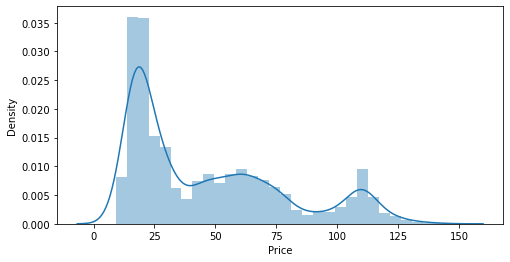

In [22]:
plt.figure(figsize=(8,4))
sns.distplot(df["Price"])
plt.show()

## checking the stationary of Price

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adf_test(x):
    res = adfuller(x)
    print("ADF stat :",res[0])
    print("P val :" , res[1])  
    if res[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adf_test(df['Price'])

ADF stat : -2.1199498309908495
P val : 0.23656870472361569
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### The price is non stationary as per ADFuller Test

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
additive_decomposition = seasonal_decompose(df['Price'], model='additive', period=365)

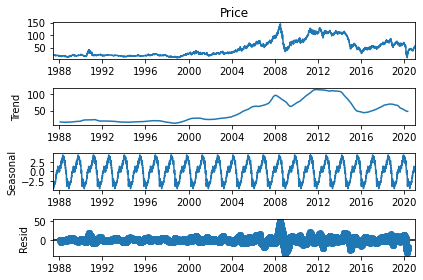

In [28]:
additive_decomposition.plot()
plt.show()


## Spliting the Data

In [29]:
train_ends = 7000

In [30]:
train = df[:7000]
test = df[7000:]
test.shape

(1554, 1)

## ACF adnd PACF

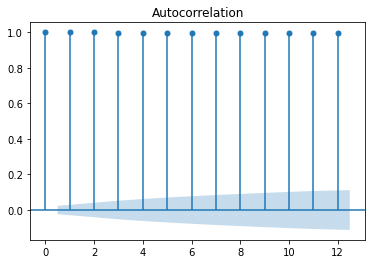

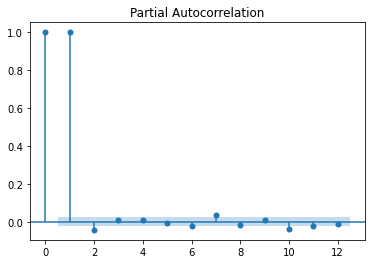

In [31]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(train,lags=12)
tsa_plots.plot_pacf(train,lags=12)
plt.show()

## Manual Method to find the PDQ 

In [32]:
import itertools

In [33]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [34]:
pdq_combination = list(itertools.product(p,d,q))

In [35]:
len(train)

7000

In [36]:
(len(df)-1)

8553

In [37]:
8553-7000

1553

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
rmse = []
order = []


In [40]:
from statsmodels. tsa. arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [41]:
i = 0
for pdq in pdq_combination:
    try:
        model = ARIMA(train,order=pdq).fit()
        pred = model.predict(start = len(train),end = (len(df)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
        print(i)
        i = i+1
    except:
        continue
        
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


In [42]:
pdq_val = pd.DataFrame(index=order,data = rmse,columns=["RMSE"])

In [43]:
pdq_val.min()

RMSE    13.154838
dtype: float64

In [44]:
pdq_val.to_csv('pdq.csv')

In [45]:
pdq_val.iloc[64]

RMSE    13.314901
Name: (4, 0, 6), dtype: float64

## Arimax

In [46]:
final = ARIMA(train,order=(4,0,6)).fit()

In [47]:
predicted = final.predict(start = len(train),end = (len(df)-1))

In [48]:
predicted = pd.DataFrame(index=test.index,data = predicted.values, columns= ["PRED"])

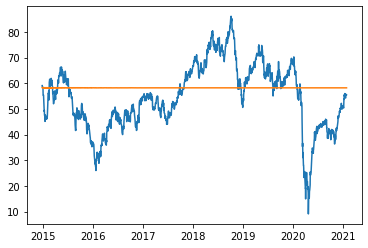

In [49]:
plt.plot(test)
plt.plot(predicted)

In [50]:
from pmdarima.arima import auto_arima

In [51]:
auto_arima(train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7000
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -10267.982
Date:                Sun, 04 Sep 2022   AIC                          20539.963
Time:                        18:54:39   BIC                          20553.670
Sample:                             0   HQIC                         20544.686
                               - 7000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0328      0.007      4.413      0.000       0.018       0.047
sigma2         1.1010      0.008    146.208      0.000       1.086       1.116
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30949.34
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              10.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Sarimax

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
Train_log = np.log(train["Price"])
Test_log = np.log(test["Price"])

In [54]:

model_sarimax = SARIMAX(Train_log,order = (4, 0, 6),seasonal_order=(0,0,0,12))

In [55]:
res = model_sarimax.fit()

In [56]:
pred_sarimax = res.predict(start = len(train),end = (len(df)-1))

In [57]:
import matplotlib.pyplot as plt

In [58]:
predicted_Sarima = pd.DataFrame(index=test.index,data = pred_sarimax.values, columns= ["PRED"])

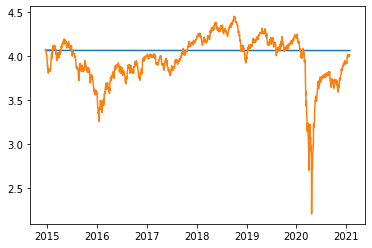

In [59]:
plt.plot(predicted_Sarima)
plt.plot(Test_log)

In [60]:
def df_x_y(df,window_size = 5):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i+5]
        x.append(row)
        label = df_as_np[i+5]
        y.append(label)
        
    
    return np.array(x),np.array(y)

In [61]:
x,y = df_x_y(df)

In [62]:
x

array([[[18.63],
        [18.45],
        [18.55],
        [18.6 ],
        [18.63]],

       [[18.45],
        [18.55],
        [18.6 ],
        [18.63],
        [18.6 ]],

       [[18.55],
        [18.6 ],
        [18.63],
        [18.6 ],
        [18.6 ]],

       ...,

       [[55.76],
        [54.8 ],
        [54.21],
        [55.38],
        [55.66]],

       [[54.8 ],
        [54.21],
        [55.38],
        [55.66],
        [55.68]],

       [[54.21],
        [55.38],
        [55.66],
        [55.68],
        [55.22]]])

In [63]:
y = np.reshape(y,(-1,1))

In [64]:
y.shape

(8549, 1)

## Splitting the data to Train ,Test and Validation

In [65]:
x_train,y_train = x[:7000], y[:7000]
x_val,y_val = x[7000:7500], y[7000:7500]
x_test,y_test = x[7500:], y[7500:]

In [66]:
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

(7000, 5, 1) (7000, 1) (500, 5, 1) (500, 1) (1049, 5, 1) (1049, 1)


## Creating LSTM model 

In [67]:
from tensorflow.keras.models import Sequential

In [68]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [69]:
model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [70]:
cp = ModelCheckpoint('model/',save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.0001),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [71]:
model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=65 , callbacks=[cp])

Epoch 1/65
202/219 [==========================>...] - ETA: 0s - loss: 3077.0000 - root_mean_squared_error: 55.4707WARNING:tensorflow:From C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1813: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets
219/219 [==============================] - 7s 30ms/step - loss: 3098.0894 - root_mean_squared_error: 55.6605 - val_loss: 2142.8823 - val_root_mean_squared_error: 46.2913
Epoch 2/65
219/219 [==============================] - 5s 25ms/step - loss: 2757.3269 - root_mean_squared_error: 52.5103 - val_loss: 1445.8390 - val_root_mean_squared_error: 38.0242
Epoch 3/65
219/219 [==============================] - 5s 24ms/step - loss: 2131.8657 - root_mean_squared_error: 46.1721 - val_los

219/219 [==============================] - 5s 24ms/step - loss: 15.9841 - root_mean_squared_error: 3.9980 - val_loss: 1.6156 - val_root_mean_squared_error: 1.2711
Epoch 26/65
219/219 [==============================] - 5s 21ms/step - loss: 12.4488 - root_mean_squared_error: 3.5283 - val_loss: 1.6105 - val_root_mean_squared_error: 1.2691
Epoch 27/65
219/219 [==============================] - 5s 22ms/step - loss: 9.9951 - root_mean_squared_error: 3.1615 - val_loss: 1.5932 - val_root_mean_squared_error: 1.2622
Epoch 28/65
219/219 [==============================] - 5s 25ms/step - loss: 8.2424 - root_mean_squared_error: 2.8710 - val_loss: 1.5882 - val_root_mean_squared_error: 1.2602
Epoch 29/65
219/219 [==============================] - 1s 4ms/step - loss: 7.0109 - root_mean_squared_error: 2.6478 - val_loss: 1.6358 - val_root_mean_squared_error: 1.2790
Epoch 30/65
219/219 [==============================] - 1s 5ms/step - loss: 6.0615 - root_mean_squared_error: 2.4620 - val_loss: 1.6413 - val_

In [72]:
from tensorflow.keras.models import load_model

In [73]:
model = load_model('model/')

In [74]:
tp = model.predict(x_train).flatten()

In [75]:
train_p = pd.DataFrame({'actual' : y_train.flatten() , 'predicted' : tp})

In [76]:
train_p

,actual,predicted
0,18.60,18.476376
1,18.60,18.440989
2,18.58,18.441572
3,18.65,18.424915
4,18.68,18.494576
...,...,...
6995,59.07,58.250996
6996,58.67,59.130375
6997,58.72,58.572777
6998,57.86,58.669346


In [77]:
import matplotlib.pyplot as plt

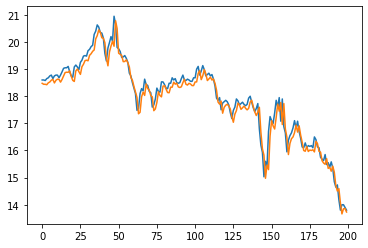

In [78]:
plt.plot(train_p['actual'][:200])
plt.plot(train_p['predicted'][:200])


In [79]:
vp = model.predict(x_val).flatten()

In [80]:
val_p = pd.DataFrame({'actual' : y_val.flatten() , 'predicted' : vp})

In [81]:
train_p

,actual,predicted
0,18.60,18.476376
1,18.60,18.440989
2,18.58,18.441572
3,18.65,18.424915
4,18.68,18.494576
...,...,...
6995,59.07,58.250996
6996,58.67,59.130375
6997,58.72,58.572777
6998,57.86,58.669346


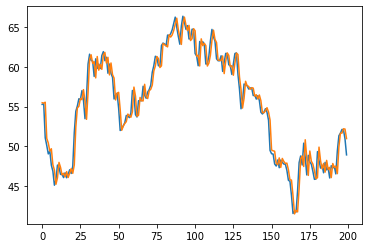

In [82]:
plt.plot(val_p['actual'][:200])
plt.plot(val_p['predicted'][:200])

In [83]:
tp = model.predict(x_test).flatten()

In [84]:
test_p = pd.DataFrame({'actual' : y_test.flatten() , 'predicted' : tp})

In [85]:
test_p


,actual,predicted
0,53.15,53.248795
1,51.72,53.201744
2,54.15,51.780746
3,53.53,54.604195
4,54.56,53.565166
...,...,...
1044,55.38,54.264118
1045,55.66,55.636467
1046,55.68,55.731148
1047,55.22,55.678356


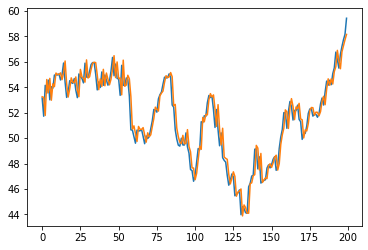

In [86]:
plt.plot(test_p['actual'][:200])
plt.plot(test_p['predicted'][:200])

In [92]:
model.save("oil_model.h5")